# Exploratory Data Analysis of the Tips Dataset
**Author:** Abdellah Boudlal  
**Date:** Sept 2025  

## Purpose
The goal of this project is to explore the `tips.csv` dataset and gain insights into restaurant tipping behavior.  
We will analyze relationships between total bill, tip percentage, gender, smoking habits, day of the week, and time of day.  


# 1. Imports 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")


# 2. Data Acquisition 

In [3]:
# Load dataset
df = pd.read_csv("tips.csv")

# Preview dataset
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 3. Initial Data Inspection

In [4]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
df.head(10)


Shape: (244, 7)

Data Types:
 total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


# 4. Summary Statistics

In [5]:
df.describe().round(2)


,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


### Observations:
- The average total bill is around \$19.
- The average tip is about \$3.
- Maximum tip percentage looks high, possible outliers.


# 5. Histograms for Numerical Columns

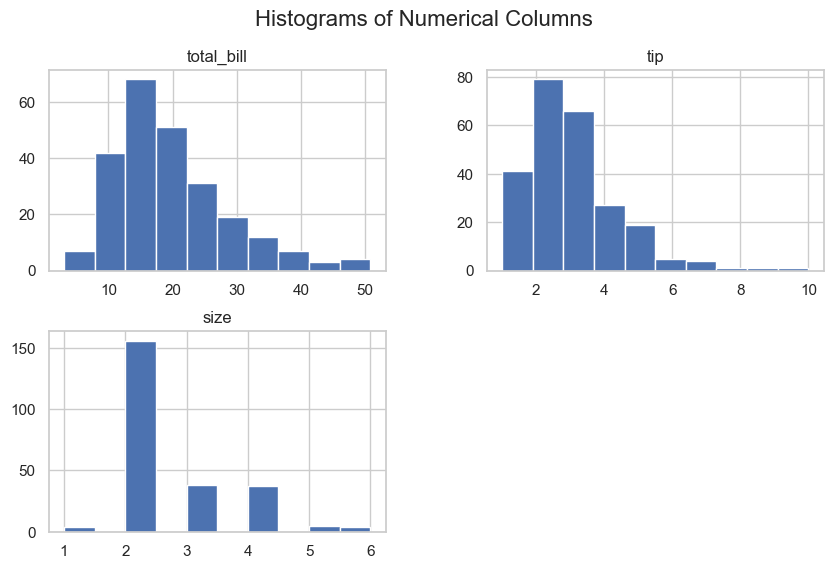

In [6]:


df.hist(figsize=(10, 6))

# Title
plt.suptitle("Histograms of Numerical Columns", fontsize=16)


plt.xlabel("Values")
plt.ylabel("Frequency")

plt.show()


### Observations:
- Most bills are under \$20.
- Most tips are between \$2 and \$4.


# 6. Categorical Distributions

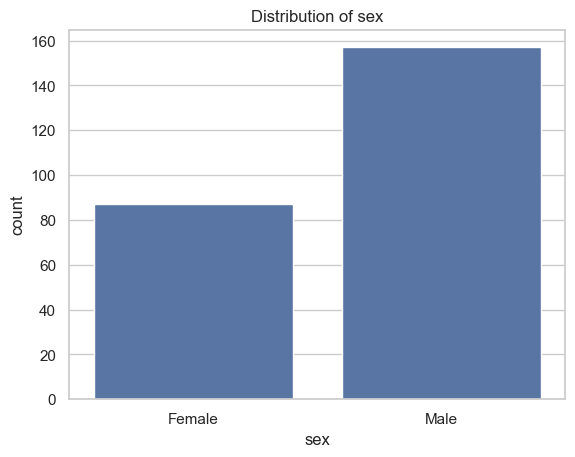

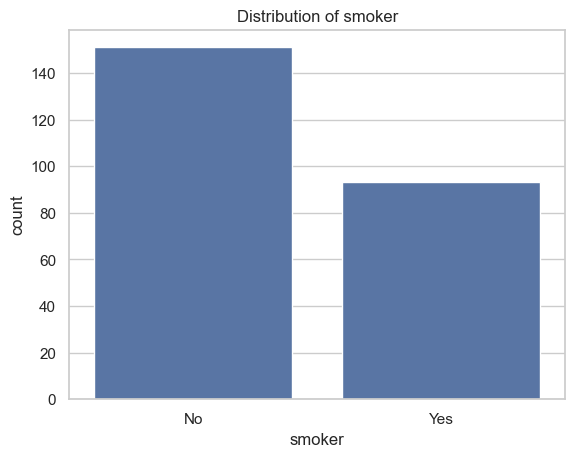

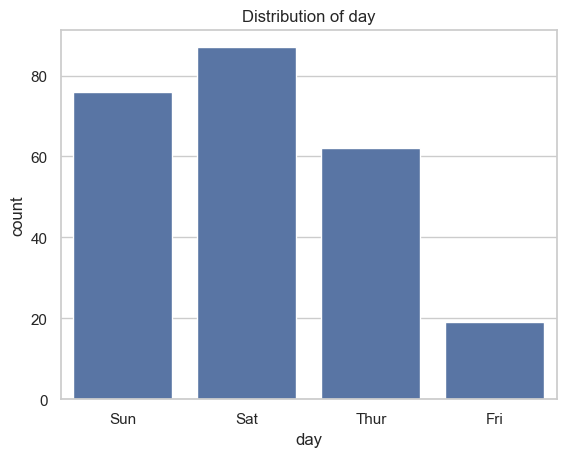

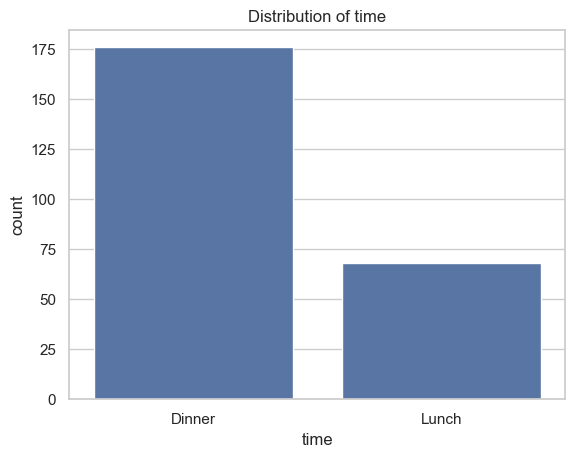

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


### Observations:
- More male customers than female.
- Most visits happen on weekends (Sat, Sun).


# 7. Feature Engineering

In [8]:
# Rename column
df = df.rename(columns={"total_bill": "bill_total"})

# Add new column: tip percentage
df["tip_percent"] = df["tip"] / df["bill_total"] * 100
df.head()


,bill_total,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


# 8. Visualizations & Stories

#### a) Relationship between Bill and Tip

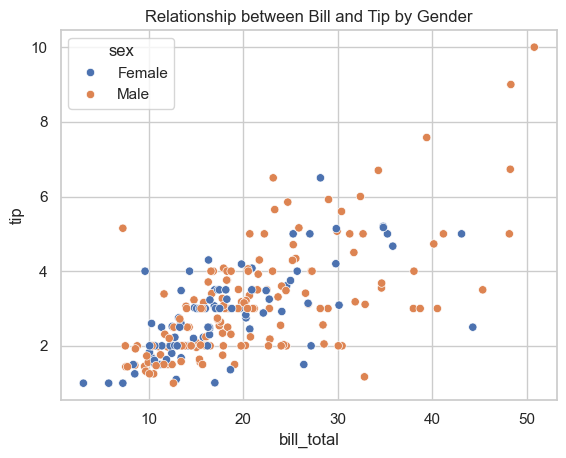

In [9]:
sns.scatterplot(x="bill_total", y="tip", hue="sex", data=df)
plt.title("Relationship between Bill and Tip by Gender")
plt.show()


**Story:** Larger bills tend to have larger tips, but tipping percentage varies.  
Men and women appear to follow similar tipping patterns overall.  


### b) Tip % by Smoker/Non-Smoker

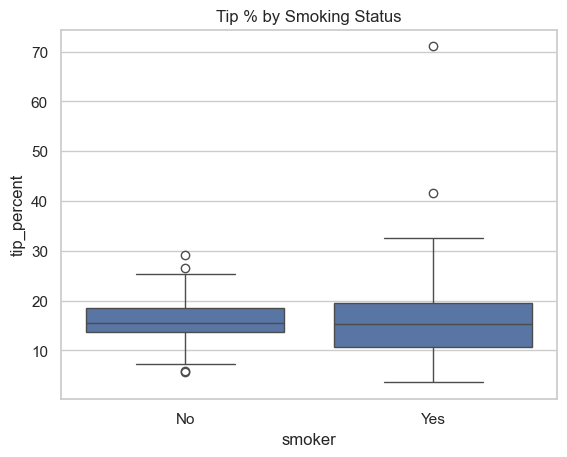

In [10]:
sns.boxplot(x="smoker", y="tip_percent", data=df)
plt.title("Tip % by Smoking Status")
plt.show()


**Story:** Non-smokers tend to leave slightly higher tip percentages than smokers.  



###  c) Average Tip by Day

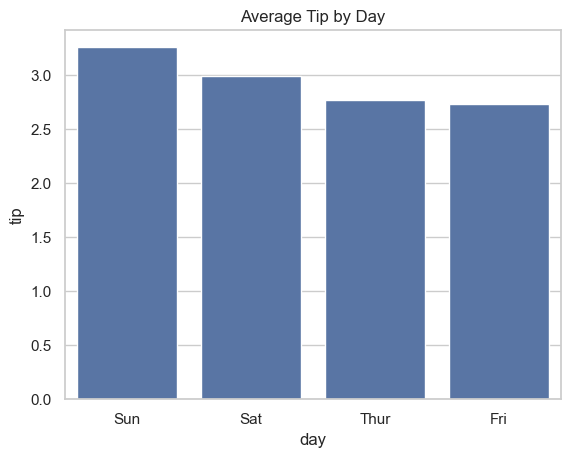

In [11]:
sns.barplot(x="day", y="tip", data=df, estimator="mean", errorbar=None)
plt.title("Average Tip by Day")
plt.show()


**Story:** Tips are higher on weekends, especially on Sunday.  


# 9. Conclusion

# Conclusion
- Average tip is ~3 dollars (around 15-16% of the bill).  
- Weekends see the highest bills and tips.  
- Non-smokers tend to tip slightly more generously.  
- Larger bills generate larger tips, but not always proportionally.  

This analysis highlights customer tipping behavior and can help restaurants better understand their clients.  
